In [32]:
import os
import pandas as pd

# Caminhos corretos (voltando um nível para acessar data/processed/)
file_paths = {
    "filtered_d_items": "../data/processed/filtered_d_items.csv",
    "icu_admissions_processed": "../data/processed/icu_admissions_processed.csv",
    "icu_treatments_processed": "../data/processed/icu_treatments_processed.csv",
}

# Verificar se os arquivos existem antes de carregar
for name, path in file_paths.items():
    print(f"{name}: {'✅ Encontrado' if os.path.exists(path) else '❌ NÃO encontrado'}")

# Carregar os DataFrames se os arquivos existirem
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items() if os.path.exists(path)}

# Exibir informações básicas
for name, df in dataframes.items():
    print(f"\n📊 {name} - Shape: {df.shape}")
    print(df.head())


filtered_d_items: ✅ Encontrado
icu_admissions_processed: ✅ Encontrado
icu_treatments_processed: ✅ Encontrado

📊 filtered_d_items - Shape: (151, 10)
   itemid                       label                abbreviation  \
0  229789  Phenylephrine (Intubation)  Phenylephrine (Intubation)   
1  229617                Epinephrine.                Epinephrine.   
2  221662                    Dopamine                    Dopamine   
3  222315                 Vasopressin                 Vasopressin   
4  229630      Phenylephrine (50/250)      Phenylephrine (50/250)   

       linksto     category unitname param_type  lownormalvalue  \
0  chartevents   Intubation      mcg    Numeric             NaN   
1  inputevents  Medications       mg   Solution             NaN   
2  inputevents  Medications       mg   Solution             NaN   
3  inputevents  Medications    units   Solution             NaN   
4  inputevents  Medications       mg   Solution             NaN   

   highnormalvalue treatment_categ

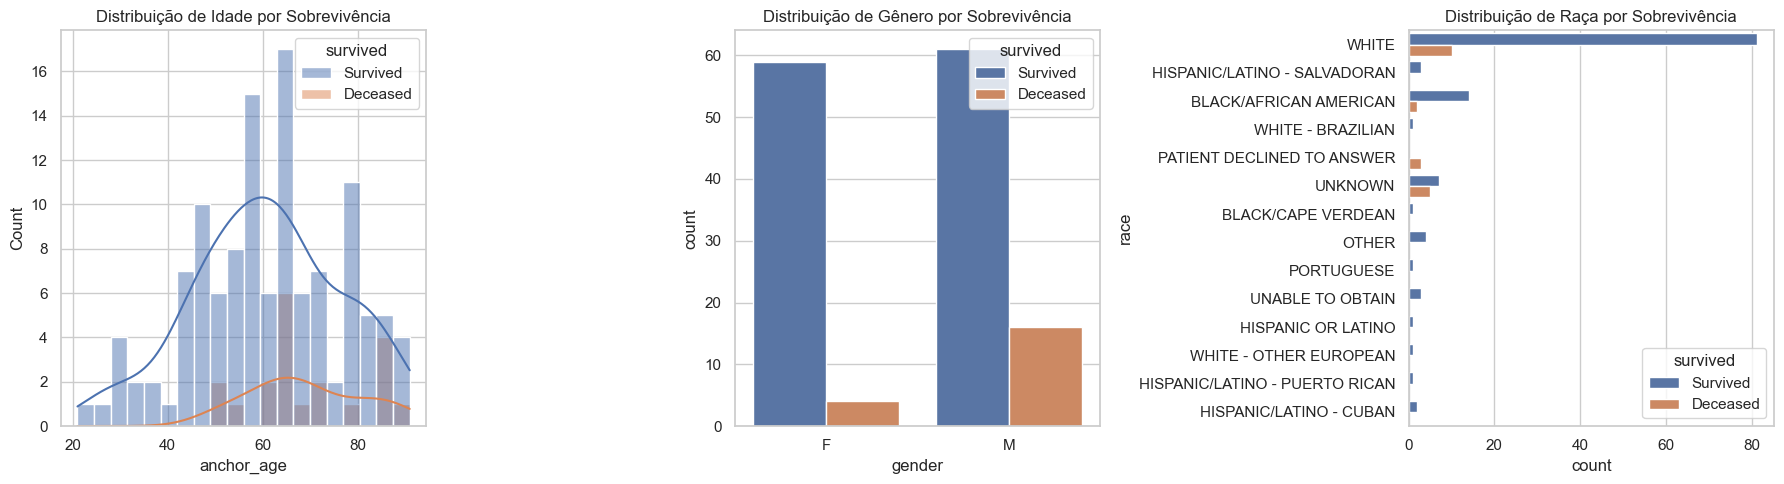

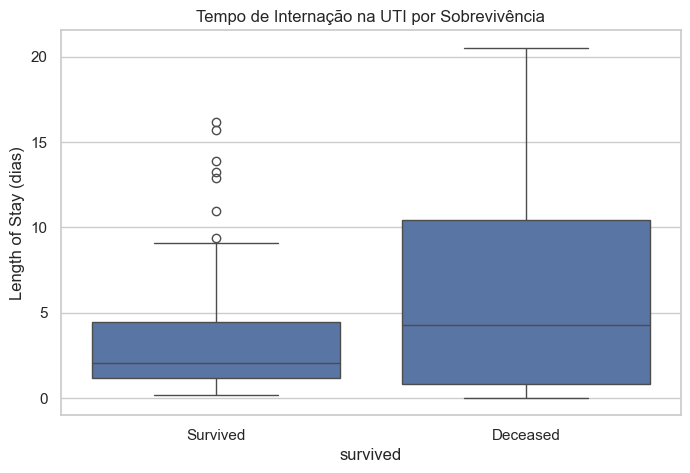

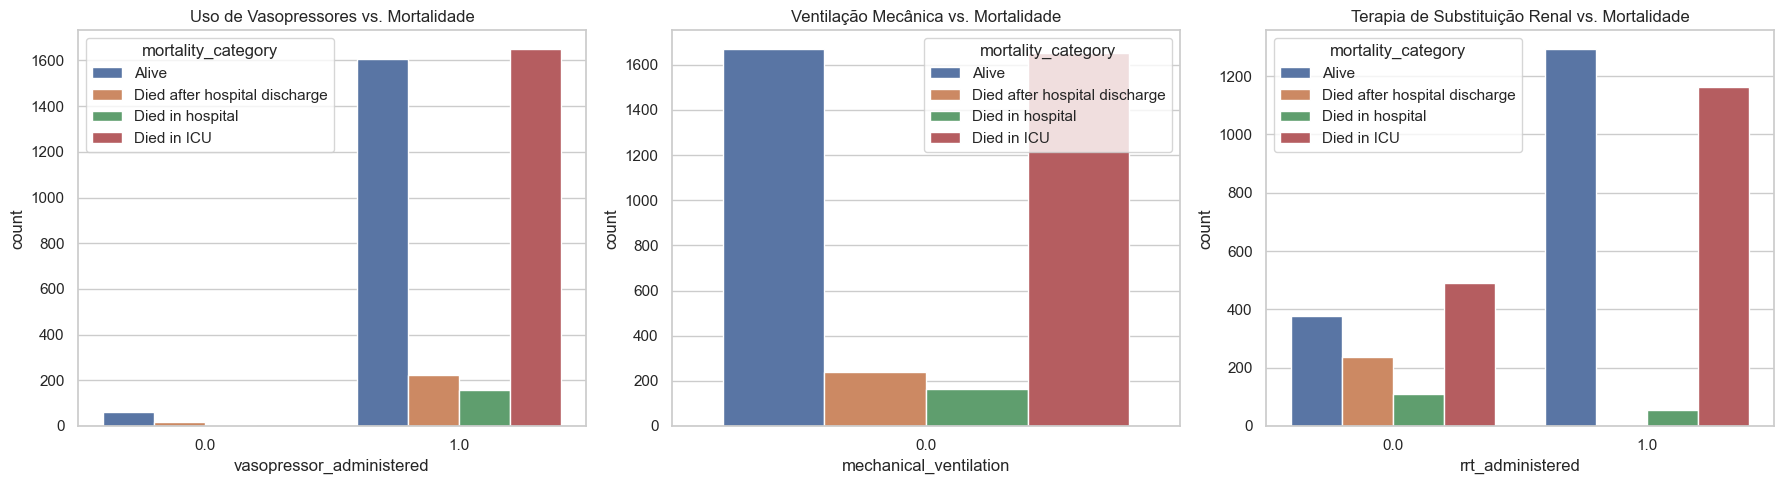

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df_icu = dataframes["icu_admissions_processed"]
df_treatments = dataframes["icu_treatments_processed"]

# Criar coluna de sobrevivência
df_icu["survived"] = df_icu["hospital_expire_flag"].apply(lambda x: "Survived" if x == 0 else "Deceased")

# 📊 1. Distribuições Demográficas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_icu, x="anchor_age", hue="survived", kde=True, bins=20, ax=axes[0])
axes[0].set_title("Distribuição de Idade por Sobrevivência")

sns.countplot(data=df_icu, x="gender", hue="survived", ax=axes[1])
axes[1].set_title("Distribuição de Gênero por Sobrevivência")

sns.countplot(data=df_icu, y="race", hue="survived", ax=axes[2])
axes[2].set_title("Distribuição de Raça por Sobrevivência")

plt.tight_layout()
plt.show()

# 📊 2. Tempo de Internação (LOS)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_icu, x="survived", y="los")
plt.title("Tempo de Internação na UTI por Sobrevivência")
plt.ylabel("Length of Stay (dias)")
plt.show()

# 📊 3. Análise de Tratamentos vs. Mortalidade
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df_treatments, x="vasopressor_administered", hue="mortality_category", ax=axes[0])
axes[0].set_title("Uso de Vasopressores vs. Mortalidade")

sns.countplot(data=df_treatments, x="mechanical_ventilation", hue="mortality_category", ax=axes[1])
axes[1].set_title("Ventilação Mecânica vs. Mortalidade")

sns.countplot(data=df_treatments, x="rrt_administered", hue="mortality_category", ax=axes[2])
axes[2].set_title("Terapia de Substituição Renal vs. Mortalidade")

plt.tight_layout()
plt.show()
